In [1]:
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
img_label_file = "data/labels.csv"

labels_csv = pd.read_csv(img_label_file, index_col=0)
labels = labels_csv.loc["fall-01"]
label_1 = labels.loc[labels["frame"] == 1]
label_1.label

fall name
fall-01   -1
Name: label, dtype: int64

In [3]:
### Read in the data
img_data_dir = "data/images/" # replace with your own dir if necessary
img_label_file = "data/labels.csv"

## Given an image name, extracts the label from the labels.csv file. True if 1 False if -1
def extract_label(file_name):
    split = file_name.split("-") # split image name
    fall_name = split[0] + "-" + split[1] # reconstruct fall name
    frame = int(split[-1].split(".")[0]) # end of split is like 113.png. removes .png part
    fall_labels = labels_csv.loc[fall_name]
    frame_label = fall_labels.loc[fall_labels["frame"] == frame]
    return int(frame_label.label) > 0

### Loads in the data from images and stores it in an array. Order is important because 
### The labels are in the same order as the images are appended to the array
def load_img_data():
    imgs = []
    labels = []
    labels_csv = pd.read_csv(img_label_file)
    
    # Iterates through fall folders and the frames within each fall
    for img_folder in os.listdir(img_data_dir):
        path = os.path.join(img_data_dir,img_folder)
        if ("fall" in path and "zip" not in path):
            for file in os.listdir(path):
                img = cv2.imread(os.path.join(path, file))
                img = cv2.resize(img ,(224,224))
                img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                imgs.append(img)
                labels.append([extract_label(file)])
                
    return imgs, labels

In [4]:
images, labels = load_img_data()

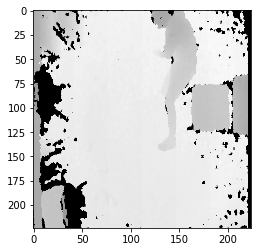

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [6]:
from sklearn.model_selection import train_test_split
images = np.asarray(images)
labels = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33)


In [7]:
# transfer learning modifications to the model

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

# model = Sequential()

# pretrained VGG16 model architecture on ImageNet
base_model = VGG16(weights='imagenet', include_top=False)
# model.add(base_model)
x = base_model.output

# x = Flatten()(x)

# add other layers
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid')) 
# for binary; it is model.add(Dense(3, activation='softmax')) for the multi-class version

model = Model(inputs=base_model.input, outputs=x)

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# for layer in base_model.layers:
#     layer.trainable = False

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [22]:
from keras.utils import plot_model

# plot_model(model, to_file='model.png')

TypeError: 'InputLayer' object is not iterable

In [26]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
#train the model
model.fit(X_train, y_train, epochs=10)

Train on 4013 samples
Epoch 1/10
4013/4013 [==============================] - 103s 26ms/sample - loss: 0.5635 - accuracy: 0.6985
Epoch 2/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6128 - accuracy: 0.6985
Epoch 3/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6092 - accuracy: 0.6980
Epoch 4/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6144 - accuracy: 0.6985
Epoch 5/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6136 - accuracy: 0.6985
Epoch 6/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6131 - accuracy: 0.6985
Epoch 7/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6284 - accuracy: 0.6985
Epoch 8/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6138 - accuracy: 0.6985
Epoch 9/10
4013/4013 [==============================] - 102s 25ms/sample - loss: 0.6125 - accuracy: 0.6985
Epoch 10/10
401

In [29]:
model.evaluate(X_test, y_test)

1977/1977 [==============================] - 20s 10ms/sample - loss: 0.6119 - accuracy: 0.6985


[0.6118548886909833, 0.6985331]

In [50]:
# transfer learning modifications to the model

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

# model = Sequential()

# pretrained VGG16 model architecture on ImageNet
base_model = VGG16(weights='imagenet', include_top=False)
# model.add(base_model)
x = base_model.output

# x = Flatten()(x)

# add other layers
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid')) 
# for binary; it is model.add(Dense(3, activation='softmax')) for the multi-class version

model = Model(inputs=base_model.input, outputs=x)

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# for layer in base_model.layers:
#     layer.trainable = False

0 input_8
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [51]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

Train on 4013 samples
Epoch 1/10
 320/4013 [=>............................] - ETA: 1:57 - loss: 3.4665 - accuracy: 0.5868

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

In [55]:
# transfer learning modifications to the model

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

# model = Sequential()

# pretrained VGG16 model architecture on ImageNet
base_model = VGG16(weights='imagenet', include_top=False)
# model.add(base_model)
x = base_model.output

# x = Flatten()(x)

# add other layers
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid')) 
# for binary; it is model.add(Dense(3, activation='softmax')) for the multi-class version

model = Model(inputs=base_model.input, outputs=x)

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)
    if i < 15: # We changed this number to change the number of blocks frozen
        layer.trainable = False

# for layer in base_model.layers:
#     layer.trainable = False

0 input_10
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [56]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10)

Train on 4013 samples
Epoch 1/10
4013/4013 [==============================] - 41s 10ms/sample - loss: 0.5546 - accuracy: 0.7117
Epoch 2/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.1791 - accuracy: 0.9305
Epoch 3/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0858 - accuracy: 0.9726
Epoch 4/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0652 - accuracy: 0.9786
Epoch 5/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0489 - accuracy: 0.9838
Epoch 6/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0428 - accuracy: 0.9873
Epoch 7/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0306 - accuracy: 0.9905
Epoch 8/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0407 - accuracy: 0.9903
Epoch 9/10
4013/4013 [==============================] - 40s 10ms/sample - loss: 0.0240 - accuracy: 0.9938
Epoch 10/10
4013/4013 [=

In [57]:
model.evaluate(X_test, y_test)

1977/1977 [==============================] - 18s 9ms/sample - loss: 0.0864 - accuracy: 0.9742


[0.08643076496107384, 0.97420335]

In [58]:
y_pred = model.predict(X_test)


In [59]:
print(y_pred, y_test)
print(y_pred > 0.5)

[[8.4061660e-11]
 [2.1979143e-17]
 [1.0105716e-17]
 ...
 [4.9143953e-19]
 [9.9017954e-01]
 [9.9903995e-01]] [[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]
[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


array([False])

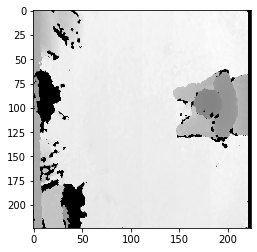

In [60]:
import matplotlib.pyplot as plt

plt.imshow(X_test[15])
y_test[15]

In [61]:
# false - not a fall , True - a fall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1376
        True       0.99      0.92      0.96       601

    accuracy                           0.97      1977
   macro avg       0.98      0.96      0.97      1977
weighted avg       0.97      0.97      0.97      1977



In [35]:
y_test_matrix = []
for i in y_test:
    y_test_matrix.append(i[0])
    
y_pred_matrix = []
y_pred_bool = y_pred > 0.5
for i in y_pred_bool:
    y_pred_matrix.append(i[0])
print(y_test_matrix, y_pred_matrix)

[False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, True, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, True, False, False, True, False, False, True, False, False, False, True, False, True,

In [27]:
import seaborn as sn
data = {'y_Actual':    1*y_test,
        'y_Predicted': 1*(y_pred > 0.5)
        }
print(data)
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,xticklabels=['Fall', 'Not Fall'], yticklabels=[ 'Fall', 'Not Fall'],fmt='g', annot=True)
plt.show()

{'y_Actual': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]]), 'y_Predicted': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])}


ValueError: If using all scalar values, you must pass an index